### **Pendahuluan**

Bab ini akan membahas Support Vector Machines (SVM), sebuah model Machine Learning yang kuat dan serbaguna. SVM mampu melakukan klasifikasi linier dan nonlinier, regresi, dan bahkan deteksi outlier. Model ini sangat populer dalam Machine Learning dan cocok untuk klasifikasi dataset berukuran kecil hingga menengah yang kompleks.

Kita akan menjelajahi konsep inti SVM, cara menggunakannya, dan bagaimana cara kerjanya.

### **1. Klasifikasi SVM Linier**

Ide fundamental di balik SVM paling baik dijelaskan dengan gambar. Mari kita lihat bagian dari dataset Iris yang diperkenalkan di Bab 4.

**1.1. Klasifikasi Margin Besar (Large Margin Classification)**

Pada dataset Iris, kedua kelas dapat dipisahkan dengan mudah menggunakan garis lurus (mereka terpisah secara linier).

Bayangkan Anda ingin memisahkan dua kelompok titik data (dua kelas) dengan sebuah garis. Ada banyak garis yang bisa memisahkan mereka dengan sempurna. SVM bertujuan untuk menemukan garis yang tidak hanya memisahkan kedua kelas, tetapi juga berada sejauh mungkin dari titik data terdekat dari kedua kelas tersebut. Ini seperti memasang "jalan" selebar mungkin di antara kedua kelas. Ini disebut **klasifikasi margin besar (large margin classification)**.

Titik-titik data yang berada di "tepi jalan" ini disebut **vektor dukungan (support vectors)**. Mereka adalah satu-satunya titik data yang memengaruhi posisi garis pemisah (decision boundary). Menambahkan lebih banyak titik data di luar "jalan" tidak akan mengubah batas keputusan sama sekali.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


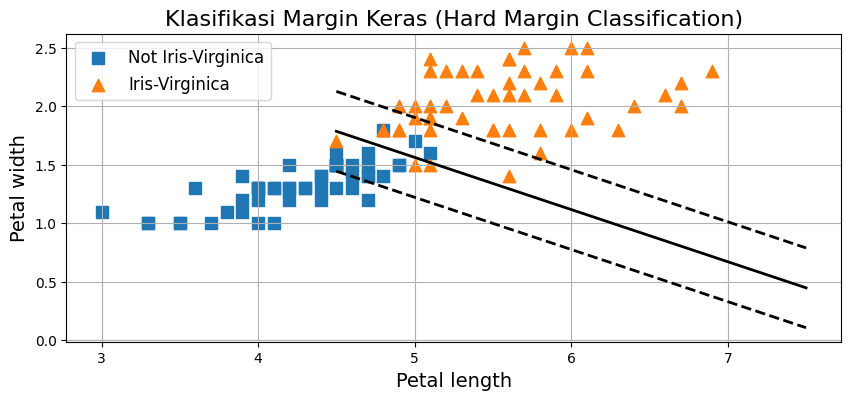

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Petal length, petal width
y = iris["target"]

# Pilih dua kelas yang terpisah secara linier untuk ilustrasi
# Misalnya, Iris-Setosa (kelas 0) vs Iris-Versicolor (kelas 1)
# atau Iris-Versicolor (kelas 1) vs Iris-Virginica (kelas 2)
# Di sini, kita akan memvisualisasikan Iris-Versicolor vs Iris-Virginica
X_filtered = X[(y == 1) | (y == 2)]
y_filtered = y[(y == 1) | (y == 2)]

# Mengubah label agar menjadi 0 dan 1 untuk binary classification
y_filtered = (y_filtered == 2).astype(np.float64)

# Latih LinearSVC untuk ilustrasi batas keputusan
# LinearSVC adalah pilihan yang baik untuk klasifikasi SVM linier
# ketika dataset sangat besar.
svm_clf_linear_hard_margin = LinearSVC(C=100000, loss="hinge", random_state=42) # C tinggi untuk hard margin
svm_clf_linear_hard_margin.fit(X_filtered, y_filtered)

# Fungsi untuk menggambar decision boundaries (disederhanakan dari buku)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Ensure b is treated as a scalar, or correctly indexed if it's an array
    # If b is an array, b[0] is correct. If b is a scalar, b is correct.
    # To handle both cases, we can check its shape or simply use b directly
    # if it's guaranteed to be a single value for a binary classifier's intercept.
    # The most robust way is to convert it to a scalar if it's a single-element array.
    b_val = b[0] if isinstance(b, np.ndarray) and b.size > 0 else b


    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # So, x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b_val/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_ if hasattr(svm_clf, 'support_vectors_') else None # Cek apakah support_vectors_ ada
    if svs is not None:
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') # Highlight support vectors
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(10, 4))
plt.scatter(X_filtered[:, 0][y_filtered == 0], X_filtered[:, 1][y_filtered == 0], s=80, marker="s", label="Not Iris-Virginica")
plt.scatter(X_filtered[:, 0][y_filtered == 1], X_filtered[:, 1][y_filtered == 1], s=80, marker="^", label="Iris-Virginica")
plot_svc_decision_boundary(svm_clf_linear_hard_margin, 4.5, 7.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Klasifikasi Margin Keras (Hard Margin Classification)", fontsize=16)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)
plt.show()

**Sensitivitas terhadap Skala Fitur:**

SVM sensitif terhadap skala fitur. Jika fitur-fitur memiliki skala yang sangat berbeda, "jalan" yang ditemukan SVM akan condong ke arah fitur dengan skala yang lebih kecil, yang mungkin bukan batas keputusan yang optimal. Oleh karena itu, **penting untuk melakukan penskalaan fitur (feature scaling)** (misalnya, menggunakan `StandardScaler` dari Scikit-Learn) sebelum melatih model SVM.

**1.2. Klasifikasi Margin Lunak (Soft Margin Classification)**

Klasifikasi margin keras (hard margin) memiliki dua masalah utama:
1.  **Hanya berfungsi jika data terpisah secara linier.** Jika ada sedikit tumpang tindih antara kelas, SVM margin keras tidak dapat menemukan solusi.
2.  **Sensitif terhadap outlier.** Satu outlier dapat mengubah batas keputusan secara drastis atau bahkan membuat solusi margin keras tidak mungkin.

Untuk mengatasi masalah ini, digunakan model yang lebih fleksibel yang disebut **klasifikasi margin lunak (soft margin classification)**. Tujuannya adalah menemukan keseimbangan yang baik antara menjaga "jalan" selebar mungkin dan membatasi pelanggaran margin (yaitu, instansi yang berakhir di tengah jalan atau bahkan di sisi yang salah).

Hyperparameter **C** dalam SVM mengontrol trade-off ini.
* **C rendah:** SVM akan mengizinkan lebih banyak pelanggaran margin tetapi akan memiliki "jalan" yang lebih lebar. Ini cenderung menghasilkan model yang lebih umum (bias lebih tinggi, varians lebih rendah).
* **C tinggi:** SVM akan mencoba membatasi pelanggaran margin sebanyak mungkin. Ini cenderung menghasilkan model yang lebih kompleks (bias lebih rendah, varians lebih tinggi) dan dapat menyebabkan overfitting.

Jika model SVM Anda mengalami overfitting, Anda dapat mencoba meregularisasinya dengan mengurangi nilai C.

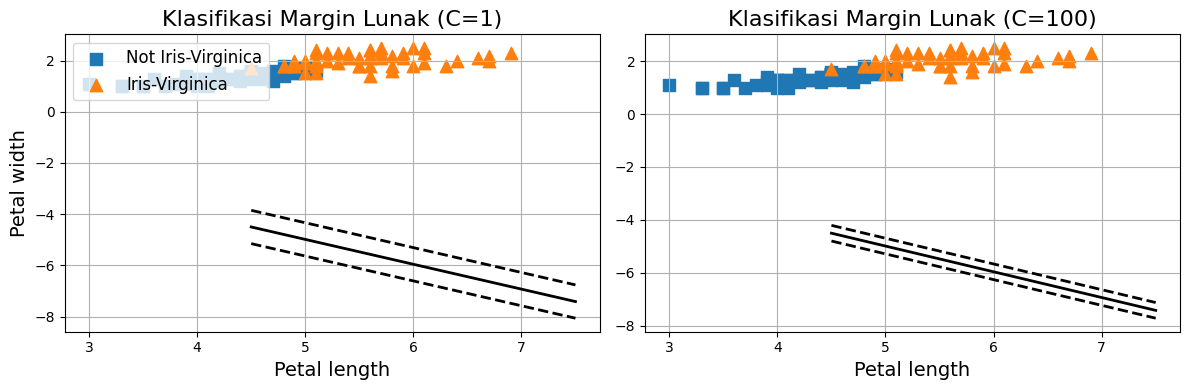

Prediksi C=1: [1.]
Prediksi C=100: [1.]
Decision function C=1: [1.36353562]
Decision function C=100: [2.99991833]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Petal length, petal width
y = iris["target"]

# Pilih dua kelas yang terpisah secara linier untuk ilustrasi
# Misalnya, Iris-Setosa (kelas 0) vs Iris-Versicolor (kelas 1)
# atau Iris-Versicolor (kelas 1) vs Iris-Virginica (kelas 2)
# Di sini, kita akan memvisualisasikan Iris-Versicolor vs Iris-Virginica
# FIX: Apply the same filter to X to create X_filtered
filter_mask = (y == 1) | (y == 2)
X_filtered = X[filter_mask] # Apply the mask to X
y_filtered = y[filter_mask] # This was already correct

# Mengubah label agar menjadi 0 dan 1 untuk binary classification
y_filtered = (y_filtered == 2).astype(np.float64)

# Fungsi untuk menggambar decision boundaries (disederhanakan dari buku)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    b_val = b[0] if isinstance(b, np.ndarray) and b.size > 0 else b

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b_val/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_ if hasattr(svm_clf, 'support_vectors_') else None
    if svs is not None:
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Latih LinearSVC dengan C rendah (soft margin) dan C tinggi (mendekati hard margin)
svm_clf_linear_soft_margin_low_C = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])
svm_clf_linear_soft_margin_low_C.fit(X_filtered, y_filtered) # Use X_filtered now

svm_clf_linear_soft_margin_high_C = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42))
])
svm_clf_linear_soft_margin_high_C.fit(X_filtered, y_filtered)

# Plot decision boundaries (soft margin)
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_filtered[:, 0][y_filtered == 0], X_filtered[:, 1][y_filtered == 0], s=80, marker="s", label="Not Iris-Virginica")
plt.scatter(X_filtered[:, 0][y_filtered == 1], X_filtered[:, 1][y_filtered == 1], s=80, marker="^", label="Iris-Virginica")
plot_svc_decision_boundary(svm_clf_linear_soft_margin_low_C.named_steps["linear_svc"], 4.5, 7.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Klasifikasi Margin Lunak (C=1)", fontsize=16)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)

plt.subplot(122)
plt.scatter(X_filtered[:, 0][y_filtered == 0], X_filtered[:, 1][y_filtered == 0], s=80, marker="s")
plt.scatter(X_filtered[:, 0][y_filtered == 1], X_filtered[:, 1][y_filtered == 1], s=80, marker="^")
plot_svc_decision_boundary(svm_clf_linear_soft_margin_high_C.named_steps["linear_svc"], 4.5, 7.5)
plt.xlabel("Petal length", fontsize=14)
plt.title("Klasifikasi Margin Lunak (C=100)", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

# Contoh prediksi
# Penskalaan fitur dilakukan di dalam pipeline
X_new = np.array([[5.5, 1.7]])
print(f"Prediksi C=1: {svm_clf_linear_soft_margin_low_C.predict(X_new)}")
print(f"Prediksi C=100: {svm_clf_linear_soft_margin_high_C.predict(X_new)}")

# Decision function score
# Mengakses linear_svc dari pipeline
print(f"Decision function C=1: {svm_clf_linear_soft_margin_low_C.named_steps['linear_svc'].decision_function(svm_clf_linear_soft_margin_low_C.named_steps['scaler'].transform(X_new))}")
print(f"Decision function C=100: {svm_clf_linear_soft_margin_high_C.named_steps['linear_svc'].decision_function(svm_clf_linear_soft_margin_high_C.named_steps['scaler'].transform(X_new))}")

**Catatan:**
* `LinearSVC` meregularisasi bias term, jadi Anda harus memusatkan training set terlebih dahulu dengan mengurangkan rata-ratanya. Ini otomatis jika Anda melakukan penskalaan data menggunakan `StandardScaler`.
* Pastikan Anda mengatur hyperparameter `loss` ke `"hinge"`, karena ini bukan nilai default.
* Untuk kinerja yang lebih baik, Anda harus mengatur hyperparameter `dual` ke `False`, kecuali jika ada lebih banyak fitur daripada instansi pelatihan.

### **2. Klasifikasi SVM Nonlinier**

Meskipun pengklasifikasi SVM linier efisien dan bekerja dengan baik dalam banyak kasus, banyak dataset tidak terpisah secara linier.

**2.1. Menambahkan Fitur untuk Dataset yang Terpisah Secara Linier**

Salah satu pendekatan untuk menangani dataset nonlinier adalah dengan menambahkan lebih banyak fitur, seperti fitur polinomial (seperti yang Anda lakukan di Bab 4). Dalam beberapa kasus, ini dapat menghasilkan dataset yang terpisah secara linier.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


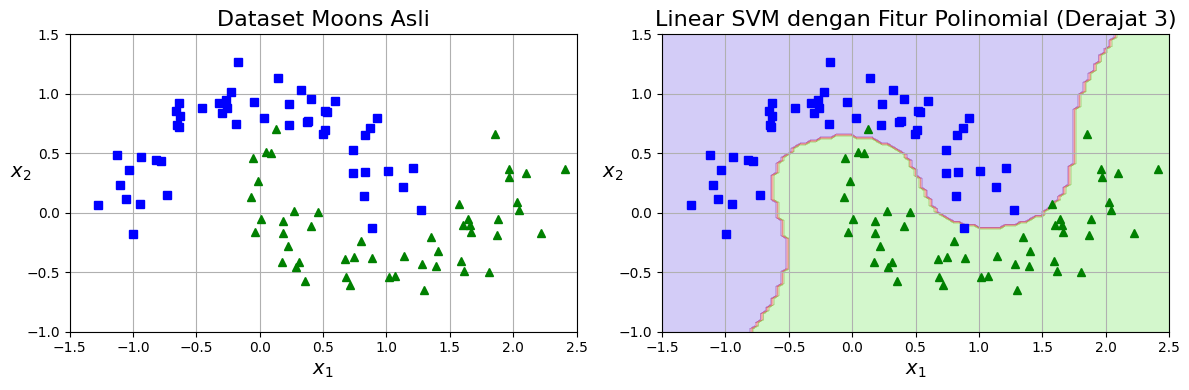

In [10]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Buat dataset moons
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

# Tambahkan fitur polinomial (derajat 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_moons_poly = poly_features.fit_transform(X_moons)

# Latih LinearSVC pada data dengan fitur polinomial
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])
polynomial_svm_clf.fit(X_moons, y_moons)

# Fungsi bantu untuk plotting decision boundary
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_plot = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_plot).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Dataset Moons Asli", fontsize=16)

plt.subplot(122)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Linear SVM dengan Fitur Polinomial (Derajat 3)", fontsize=16)
plt.tight_layout()
plt.show()

**2.2. Kernel Polinomial**

Menambahkan fitur polinomial sederhana untuk diimplementasikan dan dapat bekerja dengan baik dengan berbagai algoritma Machine Learning. Namun, dengan derajat polinomial yang rendah, metode ini tidak dapat menangani dataset yang sangat kompleks, dan dengan derajat polinomial yang tinggi, ini menciptakan sejumlah besar fitur, membuat model terlalu lambat.

Untungnya, saat menggunakan SVM, Anda dapat menerapkan teknik matematika yang hampir ajaib yang disebut **trik kernel (kernel trick)**. Trik kernel memungkinkan Anda mendapatkan hasil yang sama seolah-olah Anda telah menambahkan banyak fitur polinomial (bahkan dengan polinomial derajat sangat tinggi) tanpa benar-benar harus menambahkannya. Jadi tidak ada ledakan kombinatorial jumlah fitur karena Anda tidak benar-benar menambahkan fitur apa pun. Ini diimplementasikan oleh kelas `SVC`.

Hyperparameter `coef0` mengontrol seberapa besar model dipengaruhi oleh polinomial derajat tinggi dibandingkan polinomial derajat rendah.

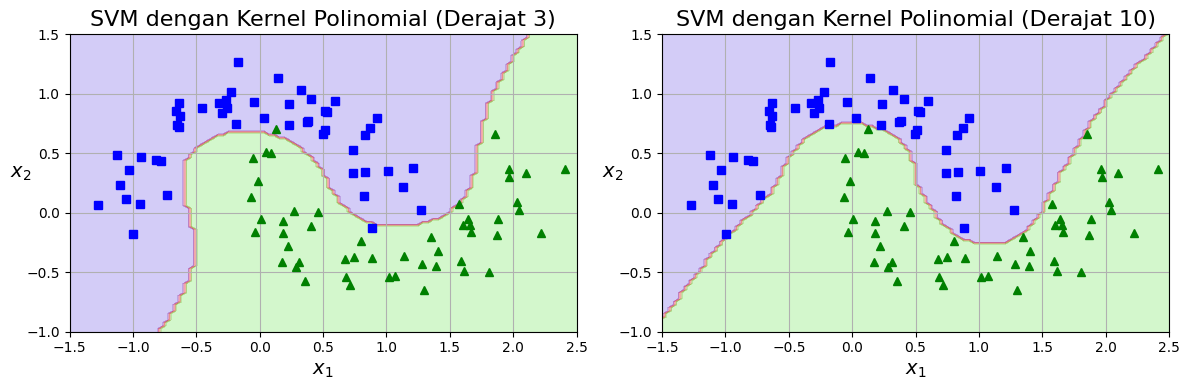

In [11]:
from sklearn.svm import SVC

# Latih SVM dengan kernel polinomial derajat 3
poly_kernel_svm_clf_degree_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42))
])
poly_kernel_svm_clf_degree_3.fit(X_moons, y_moons)

# Latih SVM dengan kernel polinomial derajat 10
poly_kernel_svm_clf_degree_10 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5, random_state=42))
])
poly_kernel_svm_clf_degree_10.fit(X_moons, y_moons)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf_degree_3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("SVM dengan Kernel Polinomial (Derajat 3)", fontsize=16)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf_degree_10, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("SVM dengan Kernel Polinomial (Derajat 10)", fontsize=16)
plt.tight_layout()
plt.show()

**2.3. Fitur Kesamaan (Similarity Features)**

Teknik lain untuk mengatasi masalah nonlinier adalah menambahkan fitur yang dihitung menggunakan fungsi kesamaan, yang mengukur seberapa mirip setiap instansi dengan sebuah "landmark" tertentu. Misalnya, fungsi Radial Basis Function (RBF) Gaussian ($\phi_{\gamma}(\mathbf{x}, \mathbf{l}) = \exp(-\gamma\|\mathbf{x} - \mathbf{l}\|^2)$) adalah fungsi berbentuk lonceng yang bervariasi dari 0 (sangat jauh dari landmark) hingga 1 (di landmark).

**2.4. Kernel RBF Gaussian**

Trik kernel juga dapat diterapkan pada metode fitur kesamaan, memungkinkan Anda memperoleh hasil yang serupa seolah-olah Anda telah menambahkan banyak fitur kesamaan. Kelas `SVC` dapat digunakan dengan kernel RBF Gaussian.

Hyperparameter `gamma` ($\gamma$) bertindak seperti hyperparameter regularisasi:
* **$\gamma$ besar:** Kurva berbentuk lonceng menjadi lebih sempit, rentang pengaruh setiap instansi lebih kecil, dan batas keputusan menjadi lebih tidak beraturan (overfitting).
* **$\gamma$ kecil:** Kurva berbentuk lonceng menjadi lebih lebar, rentang pengaruh instansi lebih besar, dan batas keputusan menjadi lebih halus (underfitting).

Anda juga dapat mengatur hyperparameter `C` untuk mengontrol regularisasi (seperti yang dijelaskan sebelumnya).

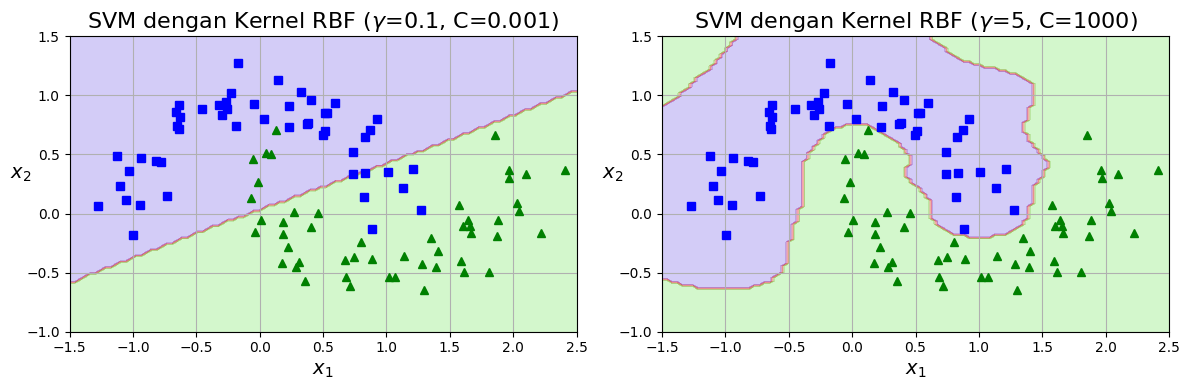

In [12]:
# Latih SVM dengan kernel RBF Gaussian dengan gamma dan C yang berbeda
rbf_kernel_svm_clf_low_gamma_low_C = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001, random_state=42))
])
rbf_kernel_svm_clf_low_gamma_low_C.fit(X_moons, y_moons)

rbf_kernel_svm_clf_high_gamma_high_C = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000, random_state=42))
])
rbf_kernel_svm_clf_high_gamma_high_C.fit(X_moons, y_moons)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(rbf_kernel_svm_clf_low_gamma_low_C, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("SVM dengan Kernel RBF ($\gamma$=0.1, C=0.001)", fontsize=16)

plt.subplot(122)
plot_predictions(rbf_kernel_svm_clf_high_gamma_high_C, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("SVM dengan Kernel RBF ($\gamma$=5, C=1000)", fontsize=16)
plt.tight_layout()
plt.show()

**Memilih Kernel:**

Sebagai aturan praktis, selalu coba kernel linier terlebih dahulu (`LinearSVC` jauh lebih cepat daripada `SVC(kernel="linear")`), terutama jika training set sangat besar atau memiliki banyak fitur. Jika training set tidak terlalu besar, Anda juga harus mencoba kernel RBF Gaussian; ini bekerja dengan baik dalam sebagian besar kasus. Kemudian jika Anda memiliki waktu luang dan daya komputasi, Anda dapat bereksperimen dengan beberapa kernel lain, menggunakan validasi silang dan pencarian grid.

### **3. Regresi SVM**

Algoritma SVM tidak hanya mendukung klasifikasi linier dan nonlinier, tetapi juga mendukung regresi linier dan nonlinier. Untuk menggunakan SVM untuk regresi alih-alih klasifikasi, triknya adalah membalikkan tujuannya: alih-alih mencoba memasang "jalan" sebesar mungkin di antara dua kelas sambil membatasi pelanggaran margin, **Regresi SVM mencoba memasang sebanyak mungkin instansi di jalan sambil membatasi pelanggaran margin (yaitu, instansi di luar jalan)**. Lebar jalan dikendalikan oleh hyperparameter `epsilon` ($\epsilon$).

**Invariansi $\epsilon$-insentif:** Menambahkan lebih banyak instansi pelatihan di dalam margin tidak memengaruhi prediksi model; dengan demikian, model dikatakan $\epsilon$-insentif.

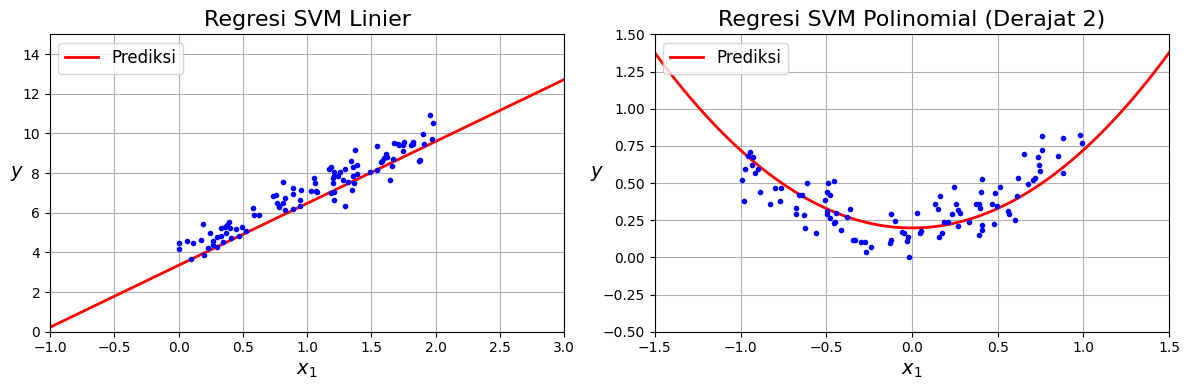

In [13]:
from sklearn.svm import LinearSVR, SVR

# Buat data regresi linear
X_reg = 2 * np.random.rand(100, 1)
y_reg = 4 + 3 * X_reg + np.random.randn(100, 1) * 0.5 # Tambahkan noise

# Latih LinearSVR (regresi SVM linier)
svm_reg_linear = LinearSVR(epsilon=1.5, random_state=42)
svm_reg_linear.fit(X_reg, y_reg.ravel())

# Buat data regresi non-linear (kuadratik)
X_quad = 2 * np.random.rand(100, 1) - 1
y_quad = 0.2 + 0.1 * X_quad + 0.5 * X_quad**2 + np.random.randn(100, 1) * 0.1

# Latih SVR dengan kernel polinomial derajat 2 (regresi SVM non-linier)
svm_reg_poly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg_poly.fit(X_quad, y_quad.ravel())

# Plot hasil regresi SVM
def plot_svr_predictions(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = clf.predict(x0s)
    plt.plot(x0s, y_pred, "r-", linewidth=2, label="Prediksi")
    plt.plot(X, y, "b.", linewidth=3)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14, rotation=0)
    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_svr_predictions(svm_reg_linear, X_reg, y_reg, [-1, 3, 0, 15])
plt.title("Regresi SVM Linier", fontsize=16)

plt.subplot(122)
plot_svr_predictions(svm_reg_poly, X_quad, y_quad, [-1.5, 1.5, -0.5, 1.5])
plt.title("Regresi SVM Polinomial (Derajat 2)", fontsize=16)

plt.tight_layout()
plt.show()

### **4. Di Balik Layar (Under the Hood)**

Bagian ini menjelaskan bagaimana SVM membuat prediksi dan bagaimana algoritma pelatihannya bekerja. Ini bersifat opsional dan lebih mendalam secara matematis.

**4.1. Fungsi Keputusan dan Prediksi**

Model klasifikasi SVM linier memprediksi kelas instansi baru $x$ dengan menghitung fungsi keputusan $\mathbf{w}^T \mathbf{x} + b$. Jika hasilnya positif, kelas yang diprediksi $\hat{y}$ adalah kelas positif (1), dan sebaliknya adalah kelas negatif (0).

Tujuan pelatihan klasifikasi SVM linier adalah menemukan nilai $\mathbf{w}$ (vektor bobot) dan $b$ (bias) yang membuat margin sebesar mungkin, sambil membatasi pelanggaran margin.

**4.2. Tujuan Pelatihan (Training Objective)**

Untuk klasifikasi margin keras, tujuannya adalah meminimalkan $\frac{1}{2} \mathbf{w}^T \mathbf{w}$ (yang setara dengan meminimalkan \|\|$\mathbf{w}$\|\| untuk memperbesar margin), dengan kendala $t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1$ untuk semua instansi, di mana $t^{(i)} = -1$ untuk instansi negatif dan $t^{(i)} = 1$ untuk instansi positif.

Untuk klasifikasi margin lunak, kita memperkenalkan **variabel kendur (slack variable)** $\zeta^{(i)} \ge 0$ untuk setiap instansi, yang mengukur seberapa banyak instansi diizinkan melanggar margin. Tujuannya menjadi trade-off antara meminimalkan $\frac{1}{2} \mathbf{w}^T \mathbf{w}$ dan meminimalkan $C \sum_{i=1}^m \zeta^{(i)}$. Hyperparameter $C$ mengontrol trade-off ini.

**4.3. Pemrograman Kuadratik (Quadratic Programming - QP)**

Masalah margin keras dan margin lunak keduanya adalah masalah optimasi kuadratik cembung dengan batasan linier. Masalah-masalah semacam itu dikenal sebagai **masalah Pemrograman Kuadratik (QP)**. Banyak solver yang tersedia untuk memecahkan masalah QP.

**4.4. Masalah Ganda (Dual Problem)**

SVM dapat dipecahkan menggunakan bentuk dual dari masalah optimasinya. Bentuk dual lebih cepat dipecahkan ketika jumlah instansi pelatihan lebih kecil daripada jumlah fitur. Lebih penting lagi, masalah dual memungkinkan trik kernel.

**4.5. SVM Berkernel (Kernelized SVMs)**

**Trik kernel** adalah teknik matematika yang secara implisit memetakan instansi ke ruang berdimensi sangat tinggi (disebut ruang fitur), memungkinkan klasifikasi dan regresi nonlinier dengan SVM. Ini memungkinkan perhitungan produk dot dalam ruang fitur tanpa secara eksplisit menghitung koordinatnya.

**4.6. SVM Online**

Untuk klasifikasi SVM linier, salah satu metode untuk mengimplementasikan SVM online adalah menggunakan Gradient Descent (misalnya, menggunakan `SGDClassifier`) untuk meminimalkan fungsi biaya yang berasal dari masalah primal.